In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


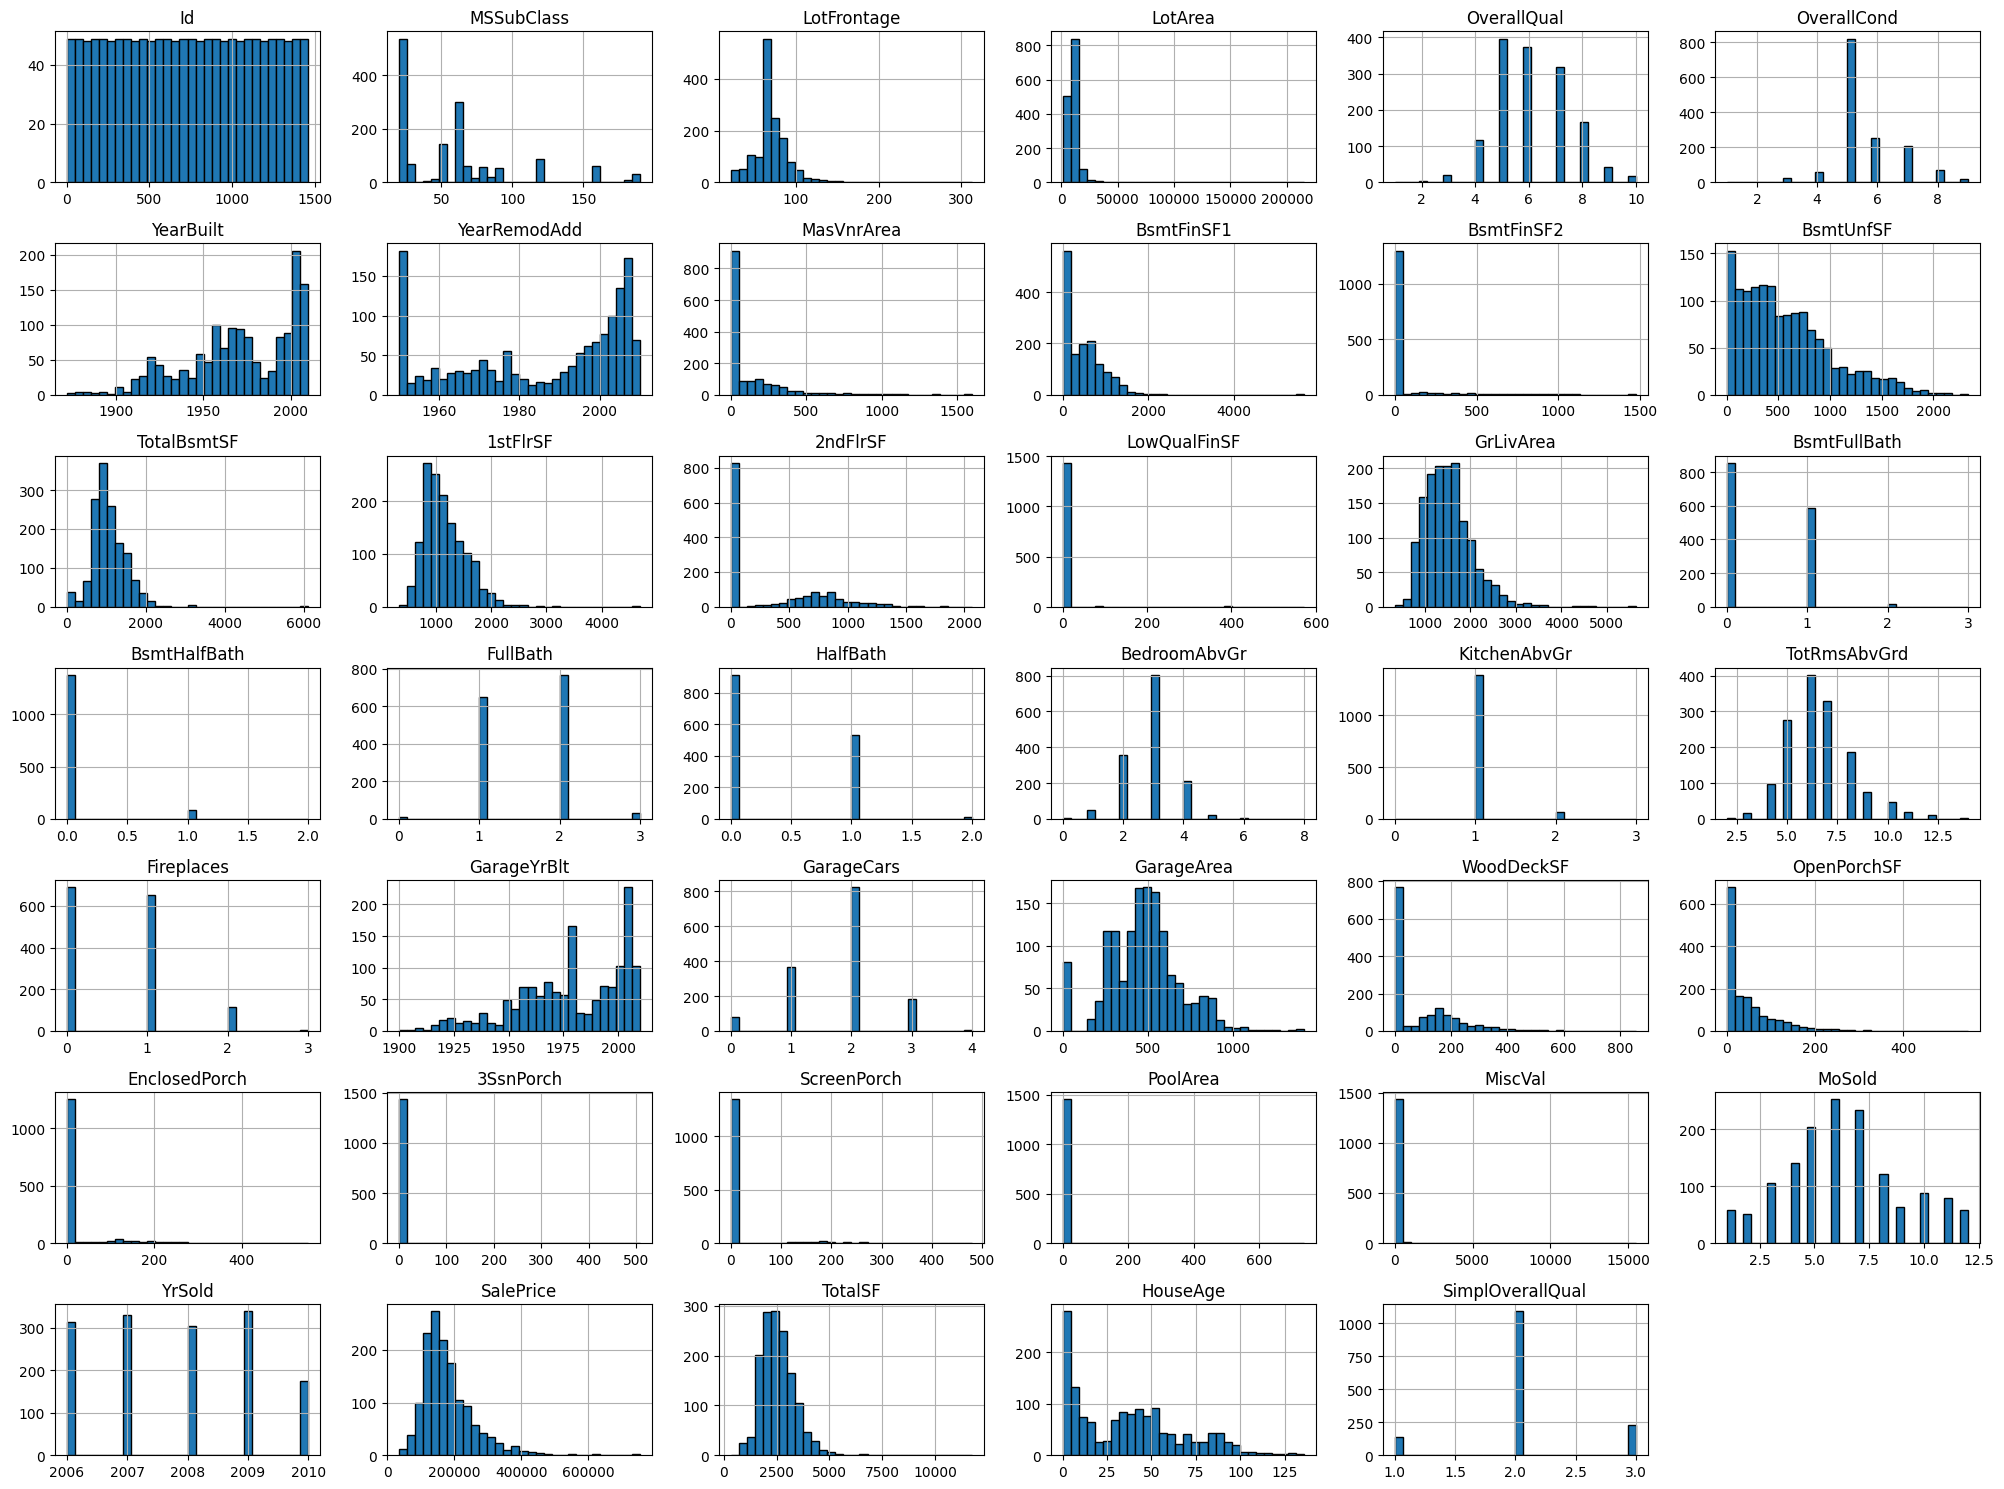

In [10]:
train.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,HouseAge,SimplOverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,2567.048630,36.547945,2.060274
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,821.714421,30.250152,0.499963
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000,0.000000,1.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2009.500000,8.000000,2.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2474.000000,35.000000,2.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3004.000000,54.000000,2.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,11752.000000,136.000000,3.000000


Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


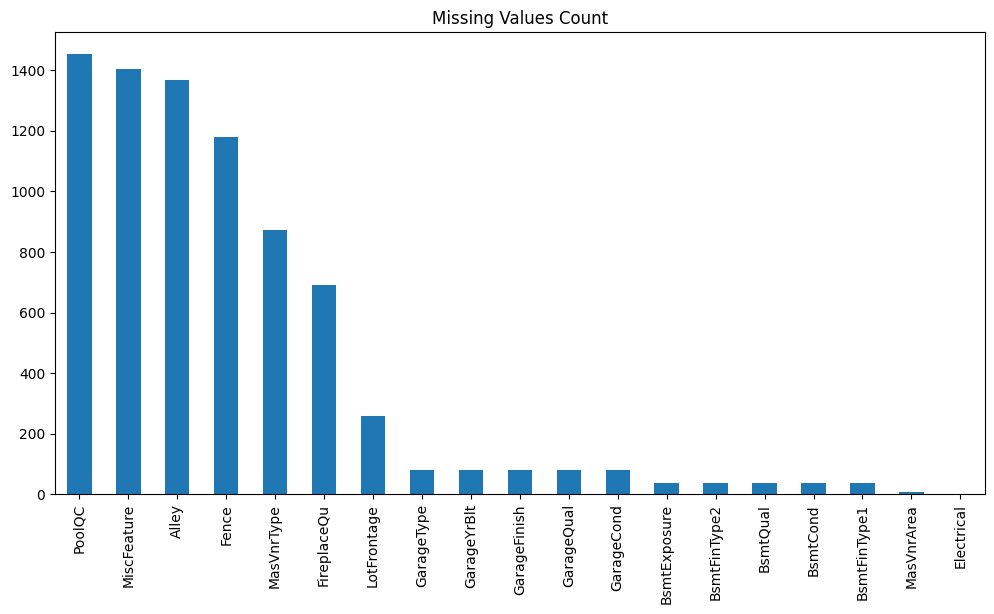

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

# Plot
plt.figure(figsize=(12,6))
missing.plot(kind='bar')
plt.title('Missing Values Count')
plt.show()

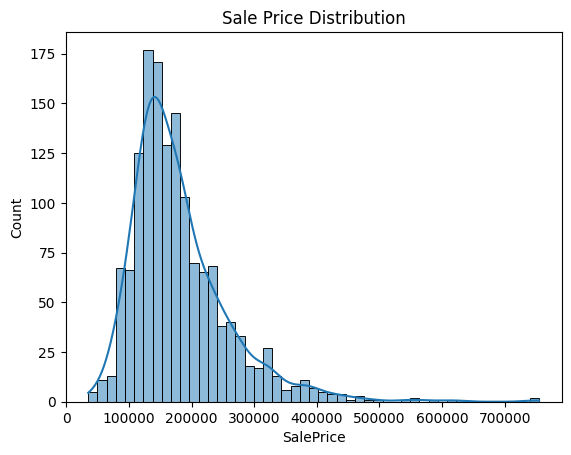

In [6]:
train.describe()
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

In [7]:
# Fill numerical values
train.fillna(train.median(numeric_only=True), inplace=True)

# Fill categorical values
for col in train.select_dtypes(include='object'):
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)

In [13]:
# Feature Engineering
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['SimplOverallQual'] = train['OverallQual'].apply(lambda x: 1 if x < 5 else (2 if x < 8 else 3))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.select_dtypes(include='object'):
    train[col] = le.fit_transform(train[col])

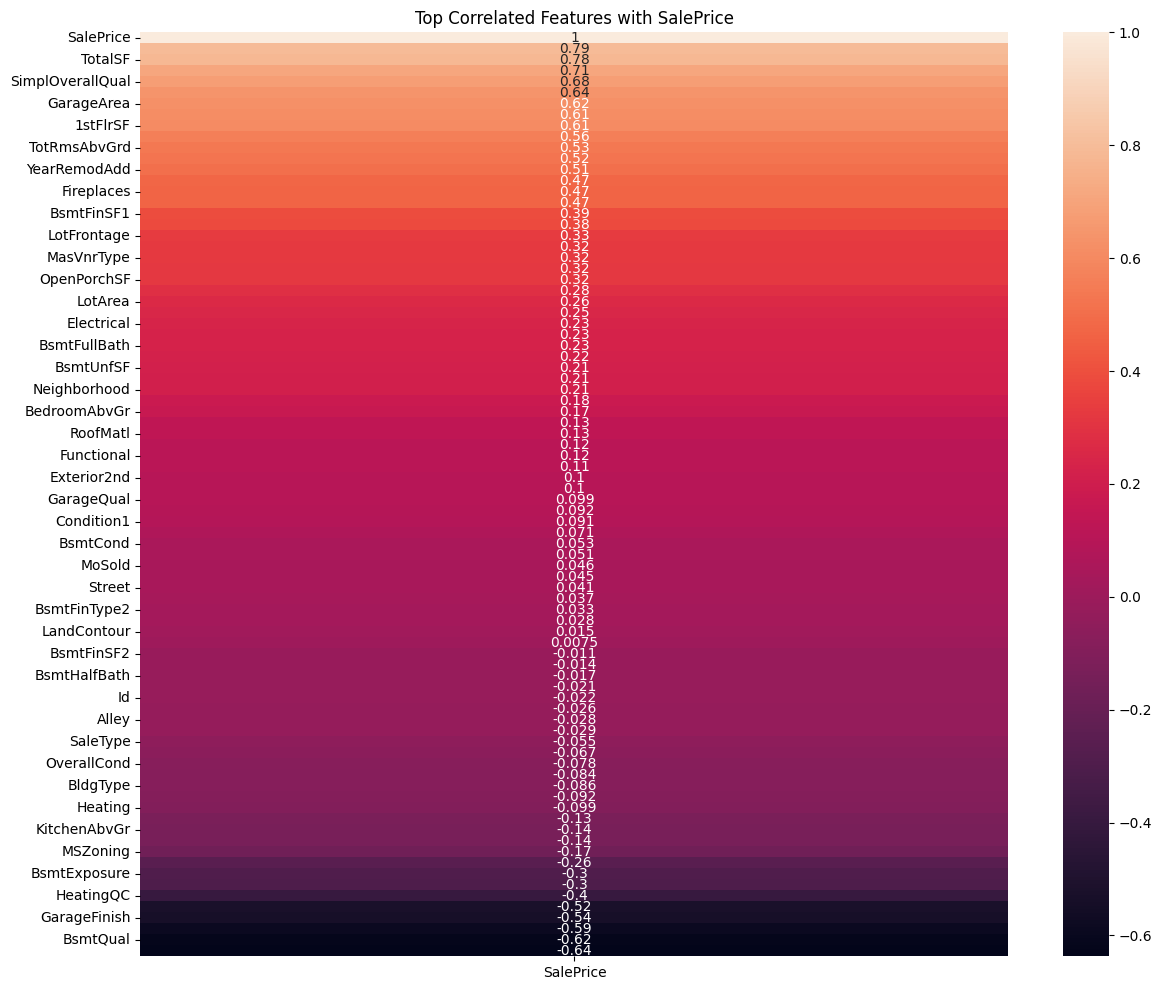

In [14]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = train.corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title("Top Correlated Features with SalePrice")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train
y_train

,SalePrice
254,145000
1066,178000
638,85000
799,175000
380,127000
...,...
1095,176432
1130,135000
1294,115000
860,189950


In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 29329.74


In [27]:
# Naive Baye's

from sklearn.naive_bayes import GaussianNB

# Training Naive Bayes
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred_NB = NB_model.predict(x_test)

# Evaluation
rmse_nb = np.sqrt(mean_squared_error(y_test, y_pred_NB))
print("Naive Bayes RMSE:", round(rmse_nb, 2))


Naive Bayes RMSE: 60253.19


In [28]:
# k-Nearest Neighbors

from sklearn.neighbors import KNeighborsRegressor

# Training KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

# Evaluation
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("KNN RMSE:", round(rmse_knn, 2))


KNN RMSE: 46893.93


In [30]:
# Decision Trees

from sklearn.tree import DecisionTreeRegressor

# Training Decision Trees
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree RMSE:", round(rmse, 2))

Decision Tree RMSE: 40138.47
